## Подготовка данных

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
#загрузка файла и вывод информации
rest_data = pd.read_csv('/datasets/rest_data.csv')
display(rest_data)
rest_data.info()

,id,object_name,chain,object_type,address,number
0,151635,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48
1,77874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35
2,24309,Кафе «Академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95
3,21894,ПИЦЦЕТОРИЯ,да,кафе,"город Москва, Абрамцевская улица, дом 1",40
4,119365,Кафе «Вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50
...,...,...,...,...,...,...
15361,208537,Шоколадница,да,кафе,"город Москва, 3-й Крутицкий переулок, дом 18",50
15362,209264,Шоколадница,да,кафе,"город Москва, улица Земляной Вал, дом 33",10
15363,209186,Шоколадница,да,кафе,"город Москва, улица Земляной Вал, дом 33",20
15364,221900,Шоколадница,да,кафе,"город Москва, поселение Московский, Киевское ш...",36


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15366 entries, 0 to 15365
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           15366 non-null  int64 
 1   object_name  15366 non-null  object
 2   chain        15366 non-null  object
 3   object_type  15366 non-null  object
 4   address      15366 non-null  object
 5   number       15366 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 720.4+ KB


In [3]:
#проверка на пропуски и дубликаты
print('Пропуски:')
print(rest_data.isna().sum())
print('Дубликаты:', rest_data.duplicated().sum())

Пропуски:
id             0
object_name    0
chain          0
object_type    0
address        0
number         0
dtype: int64
Дубликаты: 0


In [4]:
# проверка уникальных значений для столбцов с категориями
rest_data['chain'].unique()

array(['нет', 'да'], dtype=object)

In [5]:
rest_data['object_type'].unique()

array(['кафе', 'столовая', 'закусочная',
       'предприятие быстрого обслуживания', 'ресторан', 'кафетерий',
       'буфет', 'бар', 'магазин (отдел кулинарии)'], dtype=object)

В данных отсутствуют пропуски и явные дубликаты, названия столбцов удобны в использовании, форматы столбцов корректны. Проверим данные на неявные дубликаты - строки, которые содержат одинаковые названия, вид объекта и адрес.

In [6]:
#создадим новый датасет
rest_data_1 = rest_data.copy()

In [7]:
#заменим все буквы в названиях заведений на нижний регистр
rest_data_1['object_name'] = rest_data_1.object_name.str.lower()
display(rest_data_1)

,id,object_name,chain,object_type,address,number
0,151635,сметана,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48
1,77874,родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35
2,24309,кафе «академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95
3,21894,пиццетория,да,кафе,"город Москва, Абрамцевская улица, дом 1",40
4,119365,кафе «вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50
...,...,...,...,...,...,...
15361,208537,шоколадница,да,кафе,"город Москва, 3-й Крутицкий переулок, дом 18",50
15362,209264,шоколадница,да,кафе,"город Москва, улица Земляной Вал, дом 33",10
15363,209186,шоколадница,да,кафе,"город Москва, улица Земляной Вал, дом 33",20
15364,221900,шоколадница,да,кафе,"город Москва, поселение Московский, Киевское ш...",36


In [8]:
rest_data_1.duplicated(subset=['object_name', 'object_type', 'address']).sum() #подсчет дубликатов

184

In [9]:
display(rest_data_1[rest_data_1.duplicated(subset=['object_name', 'object_type', 'address'], keep=False)].sort_values(by='address').head(20))

,id,object_name,chain,object_type,address,number
5191,107485,кафе,нет,кафе,"город Москва, 1-я Останкинская улица, дом 55",6
5185,107442,кафе,нет,кафе,"город Москва, 1-я Останкинская улица, дом 55",20
5186,107574,кафе,нет,кафе,"город Москва, 1-я Останкинская улица, дом 55",10
5187,107462,кафе,нет,кафе,"город Москва, 1-я Останкинская улица, дом 55",5
5188,107466,кафе,нет,кафе,"город Москва, 1-я Останкинская улица, дом 55",5
5189,107471,кафе,нет,кафе,"город Москва, 1-я Останкинская улица, дом 55",4
5190,107480,кафе,нет,кафе,"город Москва, 1-я Останкинская улица, дом 55",5
5184,107456,кафе,нет,кафе,"город Москва, 1-я Останкинская улица, дом 55",10
5183,107450,кафе,нет,кафе,"город Москва, 1-я Останкинская улица, дом 55",20
9182,162548,кафе,нет,кафе,"город Москва, 19-й километр Московской Кольцев...",20


Видно, что некоторые дубликаты отличаются в части количества мест, но т.к дубликаты составляют менее 1,5% от исходного датасета - удалим их. Это не должно повлиять на данные, если в дубликатах нет выбросов.

In [10]:
# удалим дубликаты
rest_data_1 = rest_data_1.drop_duplicates(subset=['object_name', 'object_type', 'address']).reset_index(drop=True)
rest_data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15182 entries, 0 to 15181
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           15182 non-null  int64 
 1   object_name  15182 non-null  object
 2   chain        15182 non-null  object
 3   object_type  15182 non-null  object
 4   address      15182 non-null  object
 5   number       15182 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 711.8+ KB


## Анализ данных

### Соотношение видов объектов по количеству

In [11]:
#группировка по объектам и подсчет их количества
rest_object_type = rest_data_1.groupby('object_type', as_index=False).agg({'id': 'count'}).sort_values(by='id',ascending=False)
display(rest_object_type)

,object_type,id
3,кафе,6008
8,столовая,2575
7,ресторан,2274
6,предприятие быстрого обслуживания,1890
0,бар,853
1,буфет,570
4,кафетерий,393
2,закусочная,347
5,магазин (отдел кулинарии),272


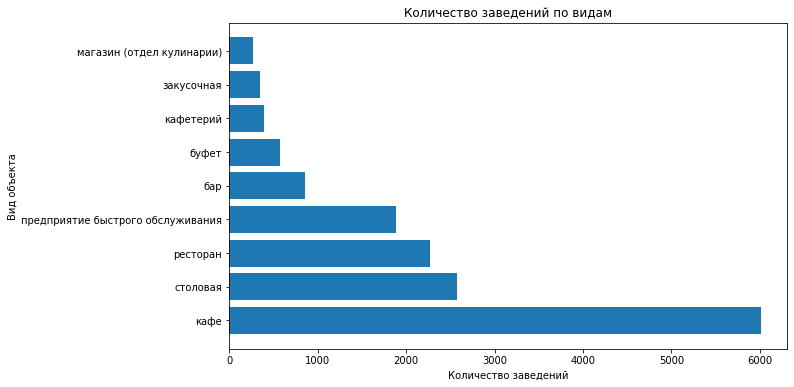

In [12]:
# построим график количества заведения по видам объектов
plt.figure(figsize=(10,6))
plt.barh(rest_object_type['object_type'], rest_object_type['id'])
plt.title('Количество заведений по видам')
plt.xlabel('Количество заведений')
plt.ylabel('Вид объекта')
plt.show()

Из графика видно, что наибольшее количество заведений в категории Кафе, затем идут Столовая, Ресторан и Предприятие быстрого обслуживания.

### Соотношение сетевых и несетевых заведений

In [13]:
# группировка по категории сетевой да/нет, подсчет количества заведений
rest_chain = rest_data_1.groupby('chain').agg({'id': 'count'})
display(rest_chain)

,id
chain,
да,2948
нет,12234


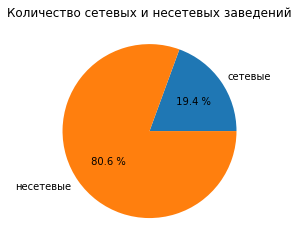

In [14]:
#построим график количества сетевых и несетевых заведений
plt.figure(figsize=(6,4))
plt.pie(rest_chain['id'], labels=['сетевые', 'несетевые'], autopct = '% 1.1f %%')
plt.title('Количество сетевых и несетевых заведений')
plt.show()

Из полученного графика видно, что в Москве преобладают несетевые заведения. Их количество примерно в 4 раза больше сетевых.

### Доля сетевых заведений по видам объектов

In [15]:
#создадим таблицу с количеством сетевых заведений
rest_network = rest_data_1[rest_data_1['chain'] == 'да'].groupby('object_type').agg({'id': 'count'})
display(rest_network)

,id
object_type,
бар,37
буфет,11
закусочная,56
кафе,1387
кафетерий,51
магазин (отдел кулинарии),78
предприятие быстрого обслуживания,784
ресторан,541
столовая,3


In [16]:
#объединим таблицы сетевых заведений и общее количество и посчитаем долю сетевых
rest_network_share = rest_object_type.merge(rest_network, left_on='object_type', right_on=rest_network.index)
rest_network_share['share'] = (rest_network_share['id_y'] / rest_network_share['id_x'] * 100).round(2)
rest_network_share.rename(columns={'key_0': 'object_type', 'id_x': 'count', 'id_y': 'chain_yes'}, inplace=True)
rest_network_share = rest_network_share.sort_values('share', ascending=False)
display(rest_network_share)

,object_type,count,chain_yes,share
3,предприятие быстрого обслуживания,1890,784,41.48
8,магазин (отдел кулинарии),272,78,28.68
2,ресторан,2274,541,23.79
0,кафе,6008,1387,23.09
7,закусочная,347,56,16.14
6,кафетерий,393,51,12.98
4,бар,853,37,4.34
5,буфет,570,11,1.93
1,столовая,2575,3,0.12


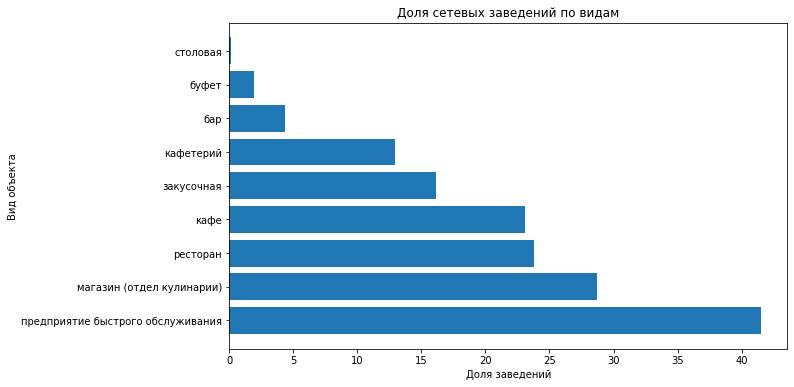

In [17]:
#построим график по долям сетевых заведений от общего количества в виде
plt.figure(figsize=(10,6))
plt.barh(rest_network_share['object_type'], rest_network_share['share'])
plt.title('Доля сетевых заведений по видам')
plt.xlabel('Доля заведений')
plt.ylabel('Вид объекта')
plt.show()

Из графика видно, что сетевые заведения наиболее характерны для Предприятий быстрого обслуживания, Магазинов(отделов кулинарии), Ресторанов и Кафе. Доля каждого составляет более 20%.

### Специфика сетевых заведений

In [18]:
# создадим таблицу только сетевых заведений
rest_network_yes = rest_data_1.query('chain == "да"')
display(rest_network_yes)

,id,object_name,chain,object_type,address,number
3,21894,пиццетория,да,кафе,"город Москва, Абрамцевская улица, дом 1",40
6,148815,брусника,да,кафе,"город Москва, переулок Сивцев Вражек, дом 6/2",10
13,22579,алло пицца,да,кафе,"город Москва, улица Авиаторов, дом 14",32
16,144107,суши wok,да,предприятие быстрого обслуживания,"город Москва, Азовская улица, дом 3",7
18,58565,тануки,да,ресторан,"город Москва, Большая Академическая улица, дом 65",160
...,...,...,...,...,...,...
15177,222077,кофейня «шоколадница»,да,кафе,"город Москва, Кантемировская улица, дом 47",72
15178,219759,шоколадница,да,кафе,"город Москва, улица Вавилова, дом 3",36
15179,208537,шоколадница,да,кафе,"город Москва, 3-й Крутицкий переулок, дом 18",50
15180,209264,шоколадница,да,кафе,"город Москва, улица Земляной Вал, дом 33",10


[Text(0.5, 1.0, 'Количество мест в сетевых заведениях'),
 Text(0.5, 0, 'Количество мест')]

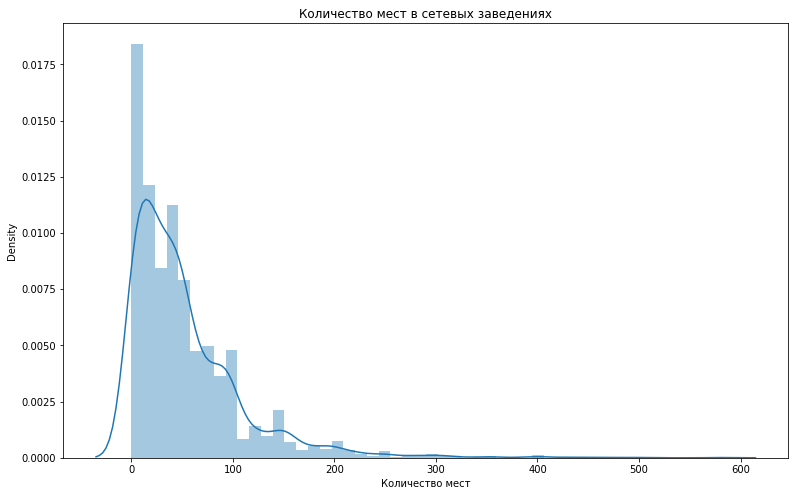

In [19]:
#построим график распределения количества мест в сетевых заведениях
import warnings
warnings.filterwarnings("ignore")
plt.figure(figsize=(13, 8))
sns.distplot(rest_network_yes['number']).set(title='Количество мест в сетевых заведениях', xlabel='Количество мест')

Из графика видно, что большинство сетевых заведений не превышают 100 мест. Для более точной оценки рассчитаем 95 и 99 перцентиль.

In [20]:
# посчитаем 95-й и 99-й перцентили количества мест
print(np.percentile(rest_network_yes['number'], [95, 99]))

[159.   275.53]


Не более 5% процентов сетевых заведений имеют больше 160 посадочных мест.

Посмотрим картину по заведениям. Сгруппируем заведения по названию и построим диаграмму рассеяния.

([], [])

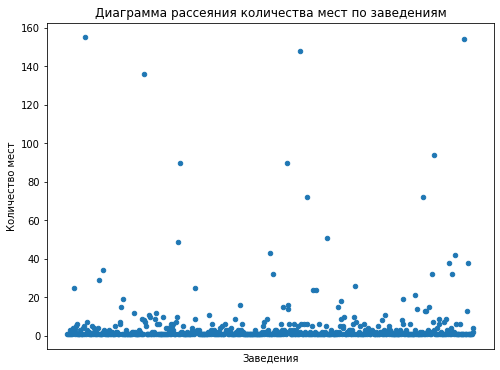

In [21]:
rest_name = rest_network_yes.groupby('object_name', as_index=False).agg({'number': 'count'})
rest_name.plot(x='object_name', y='number', kind='scatter', figsize=(8,6))
plt.title('Диаграмма рассеяния количества мест по заведениям')
plt.xlabel('Заведения')
plt.ylabel('Количество мест')
plt.xticks([])

Масштабируем график для удобства отображения информации.

([], [])

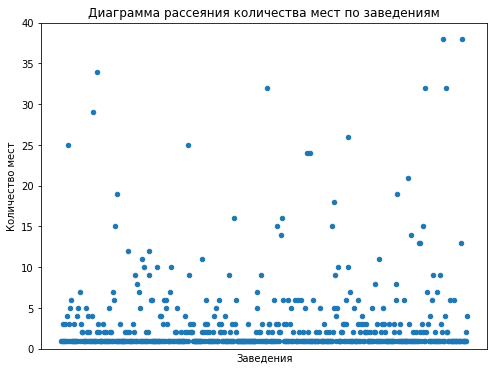

In [22]:
rest_name.plot(x='object_name', y='number', kind='scatter', figsize=(8,6), ylim=(0, 40))
plt.title('Диаграмма рассеяния количества мест по заведениям')
plt.xlabel('Заведения')
plt.ylabel('Количество мест')
plt.xticks([])

Из диаграммы видно, что в большинстве заведений до 20 мест.

### Среднее количество мест по видам объектов

In [23]:
#сгруппируем объекты по видам и посчитаем среднее количество мест
number_count = rest_data_1.groupby('object_type', as_index=False).agg({'number': 'mean'}).sort_values(by='number', ascending=False)
display(number_count)

,object_type,number
8,столовая,130.367767
7,ресторан,97.065963
1,буфет,51.487719
0,бар,43.602579
3,кафе,39.886984
6,предприятие быстрого обслуживания,20.787302
4,кафетерий,9.221374
2,закусочная,7.685879
5,магазин (отдел кулинарии),5.610294


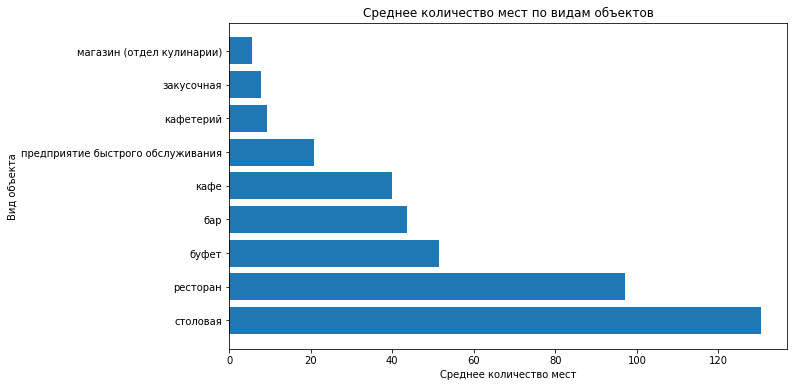

In [24]:
# построим график среднего количества мест по видам объектов
plt.figure(figsize=(10,6))
plt.barh(number_count['object_type'], number_count['number'])
plt.title('Среднее количество мест по видам объектов')
plt.xlabel('Среднее количество мест')
plt.ylabel('Вид объекта')
plt.show()

Наибольшее среднее количество мест наблюдается для ресторанов и столовых. Для проверки влияния выбросов на данный показатель построим диаграмму "ящик с усами".

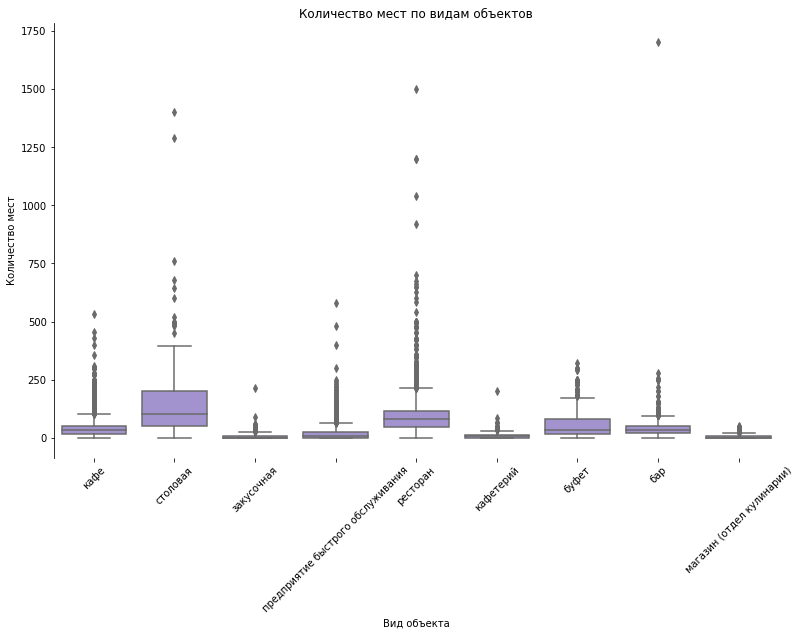

In [25]:
#построим ящик с усами
plt.figure(figsize=(13,8))
sns.boxplot(data=rest_data_1, x = 'object_type', y = 'number', color='#9d89d8')
sns.despine(bottom=True)
plt.title('Количество мест по видам объектов')
plt.xlabel('Вид объекта')
plt.ylabel('Количество мест')
plt.xticks(rotation=45)
plt.show()

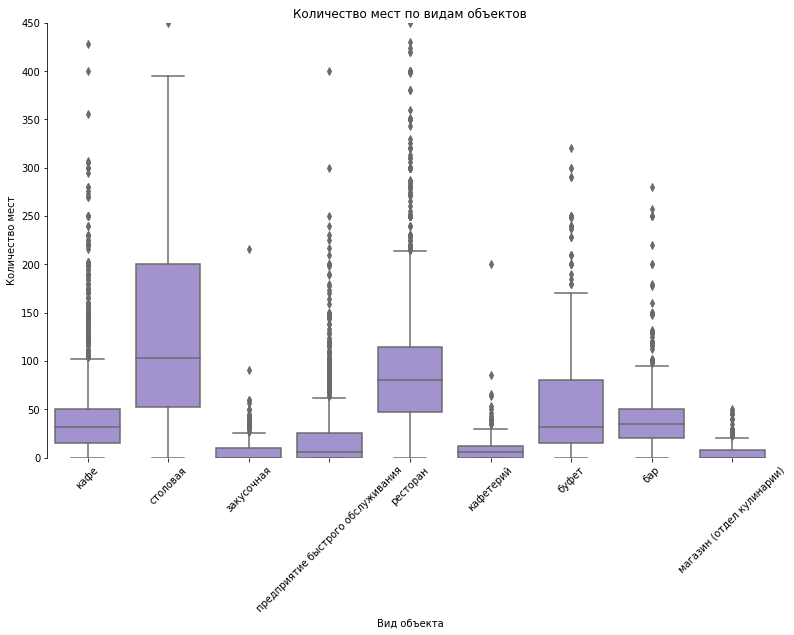

In [26]:
# изменим масштаб оси Y для нагрлядности
plt.figure(figsize=(13,8))
sns.boxplot(data=rest_data_1, x = 'object_type', y = 'number', color='#9d89d8').set(ylim=(0, 450))
sns.despine(bottom=True)
plt.title('Количество мест по видам объектов')
plt.xlabel('Вид объекта')
plt.ylabel('Количество мест')
plt.xticks(rotation=45)
plt.show()

Из данного графика видно, что действительно такие видов объектов как столовая и ресторан имеют наибольшее среднее и медианное значение.

### Расположение объектов общественного питания

In [27]:
#создаем список со всеми возможными указаниями улиц
street_types = ['улица', 'бульвар', 'проспект', 'переулок', 'шоссе', 
'проезд', 'набережная', 'площадь', 'аллея', 'линия', 'квартал', 'мост', 'тупик', 'просека']
#создаем формулу выделения улицы
def street_finder(address):
    for address_part in address.split(', '):
        for street_type in street_types:
            if address_part.lower().find(street_type)!= -1:
                return address_part
#применяем формулу к таблице для создания нового столбца
rest_data_1['street'] = rest_data_1['address'].apply(street_finder)
print('Пропуски')
print(rest_data_1.isna().sum())#проверяем на наличие пропусков
display(rest_data_1)

Пропуски
id               0
object_name      0
chain            0
object_type      0
address          0
number           0
street         377
dtype: int64


,id,object_name,chain,object_type,address,number,street
0,151635,сметана,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48,улица Егора Абакумова
1,77874,родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35,улица Талалихина
2,24309,кафе «академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95,Абельмановская улица
3,21894,пиццетория,да,кафе,"город Москва, Абрамцевская улица, дом 1",40,Абрамцевская улица
4,119365,кафе «вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50,Абрамцевская улица
...,...,...,...,...,...,...,...
15177,222077,кофейня «шоколадница»,да,кафе,"город Москва, Кантемировская улица, дом 47",72,Кантемировская улица
15178,219759,шоколадница,да,кафе,"город Москва, улица Вавилова, дом 3",36,улица Вавилова
15179,208537,шоколадница,да,кафе,"город Москва, 3-й Крутицкий переулок, дом 18",50,3-й Крутицкий переулок
15180,209264,шоколадница,да,кафе,"город Москва, улица Земляной Вал, дом 33",10,улица Земляной Вал


В столбце с наименованиями улиц найдено 377 пропуска. Посмотрим где они находятся.

In [28]:
rest_data_1[rest_data_1['street'].isna()]

,id,object_name,chain,object_type,address,number,street
1402,20199,это,нет,кафе,"город Москва, город Зеленоград, корпус 401",35,None
1403,68113,френдс,нет,кафе,"город Москва, город Зеленоград, корпус 435",34,None
1404,20105,кафе «граф монте-кристо»,нет,кафе,"город Москва, город Зеленоград, корпус 436",40,None
1405,22982,альфорно,нет,кафе,"город Москва, город Зеленоград, корпус 438",49,None
1406,150537,кафе «вечный зов»,нет,кафе,"город Москва, город Зеленоград, корпус 834А",30,None
...,...,...,...,...,...,...,...
14822,216942,шашлычный дворик,нет,кафе,"город Москва, поселение Десеновское, деревня В...",15,None
14823,216926,кафе «сахли»,нет,закусочная,"город Москва, поселение Десеновское, деревня В...",10,None
14836,208239,газпромнефть,нет,кафе,"поселение ""Мосрентген"", деревня Дудкино, владе...",20,None
15004,220587,пицца паоло,да,кафетерий,"город Москва, город Зеленоград, корпус 1627",0,None


Пропуски находятся в строках с поселениями/деревнями и др., для дальнейшего анализа удалим эти строки.

In [29]:
data_with_streets = rest_data_1[~(rest_data_1['street'].isnull())]

### Топ 10 улиц с наибольшим количеством заведений

In [30]:
#создадим таблицу топ 10 наиболее популярных для заведения улиц
top_street = data_with_streets.groupby('street', as_index=False).agg({'id': 'count'}).sort_values(by='id', ascending=False).head(10)
display(top_street)

,street,id
1426,проспект Мира,196
1014,Профсоюзная улица,181
686,Ленинградский проспект,172
997,Пресненская набережная,165
399,Варшавское шоссе,163
689,Ленинский проспект,148
1422,проспект Вернадского,126
676,Кутузовский проспект,114
599,Каширское шоссе,110
606,Кировоградская улица,107


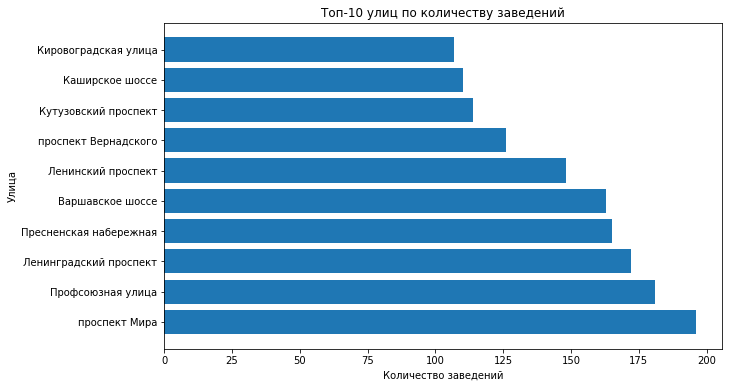

In [31]:
# построим график топ 10 популярных улиц
plt.figure(figsize=(10,6))
plt.barh(top_street['street'], top_street['id'])
plt.title('Топ-10 улиц по количеству заведений')
plt.xlabel('Количество заведений')
plt.ylabel('Улица')
plt.show()

In [32]:
#подгружаем базу с улицами и районами Москвы
from io import BytesIO
import requests
spreadsheet_id = '1awwhvwLXOqgU7ik7DeT-XJVrjRgmeaeTs8wjnSAdTsw'
file_name = 'https://docs.google.com/spreadsheets/d/{}/export?format=csv'.format(spreadsheet_id)
r = requests.get(file_name)
df = pd.read_csv(BytesIO(r.content))
df

,streetname,areaid,okrug,area
0,Выставочный переулок,17,ЦАО,Пресненский район
1,улица Гашека,17,ЦАО,Пресненский район
2,Большая Никитская улица,17,ЦАО,Пресненский район
3,Глубокий переулок,17,ЦАО,Пресненский район
4,Большой Гнездниковский переулок,17,ЦАО,Пресненский район
...,...,...,...,...
4401,Пыжёвский переулок,21,ЦАО,Район Якиманка
4402,Новохорошёвский проезд,92,СЗАО,Район Хорошево-Мневники
4403,Новобутовский проезд,133,ЮЗАО,Район Южное Бутово
4404,Нижний Таганский тупик,18,ЦАО,Таганский район


In [33]:
df.columns = ['street', 'areaid', 'okrug', 'area']#для удобства изменим название столбца с улицами

In [34]:
#объединим таблицы по таблице с 1 заведением
streets_top_merged = top_street.merge(df[['street', 'area']], left_on='street', right_on='street', how='left')
display(streets_top_merged)
print('Пропуски', streets_top_merged['area'].isna().sum())

,street,id,area
0,проспект Мира,196,Алексеевский район
1,проспект Мира,196,Ярославский Район
2,проспект Мира,196,Район Марьина роща
3,проспект Мира,196,Останкинский район
4,проспект Мира,196,Район Ростокино
5,проспект Мира,196,Район Свиблово
6,проспект Мира,196,Мещанский район
7,Профсоюзная улица,181,Академический район
8,Профсоюзная улица,181,Район Черемушки
9,Профсоюзная улица,181,Район Ясенево


Пропуски 0


In [35]:
print('Районы, в которых находятся улицы из топ 10:')
for area in streets_top_merged['area'].sort_values().unique():
    print('-', area)

Районы, в которых находятся улицы из топ 10:
- Академический район
- Алексеевский район
- Донской район
- Ломоносовский район
- Мещанский район
- Нагорный район
- Обручевский район
- Останкинский район
- Пресненский район
- Район Аэропорт
- Район Беговой
- Район Гагаринский
- Район Дорогомилово
- Район Коньково
- Район Марьина роща
- Район Москворечье-Сабурово
- Район Нагатино-Садовники
- Район Орехово-Борисово Северное
- Район Орехово-Борисово Южное
- Район Проспект Вернадского
- Район Раменки
- Район Ростокино
- Район Свиблово
- Район Северное Бутово
- Район Сокол
- Район Теплый Стан
- Район Тропарево-Никулино
- Район Фили-Давыдково
- Район Черемушки
- Район Чертаново Северное
- Район Чертаново Центральное
- Район Чертаново Южное
- Район Южное Бутово
- Район Якиманка
- Район Ясенево
- Хорошевский район
- Ярославский Район


### Улицы с одним объектом общественного питания

In [36]:
#получим таблицу с 1 заведением на улице
street_group = data_with_streets.groupby('street', as_index=False).agg({'id': 'count'})
street_with_one = street_group.query('id == 1')
display(street_with_one)

,street,id
2,1-й Балтийский переулок,1
3,1-й Басманный переулок,1
4,1-й Ботанический проезд,1
7,1-й Вешняковский проезд,1
9,1-й Голутвинский переулок,1
...,...,...
1891,улица Шумилова,1
1892,улица Шумкина,1
1896,улица Щорса,1
1897,улица Энгельса,1


In [37]:
#объединим таблицы по таблице с 1 заведением
streets_with_one_merged = street_with_one.merge(df[['street', 'area']], left_on='street', right_on='street', how='left')
display(streets_with_one_merged)
print('Пропуски', streets_with_one_merged['area'].isna().sum())

,street,id,area
0,1-й Балтийский переулок,1,Район Аэропорт
1,1-й Басманный переулок,1,Басманный район
2,1-й Басманный переулок,1,Красносельский район
3,1-й Ботанический проезд,1,Район Свиблово
4,1-й Вешняковский проезд,1,Рязанский район
...,...,...,...
592,улица Шумилова,1,Район Кузьминки
593,улица Шумкина,1,Район Сокольники
594,улица Щорса,1,Район Солнцево
595,улица Энгельса,1,Басманный район


Пропуски 25


Видно, что таблица содержит пропуск, проверим где они находятся.

In [38]:
streets_with_one_merged[streets_with_one_merged['area'].isna()]

,street,id,area
6,1-й Заречный переулок,1,NaN
32,1-я Ватутинская улица,1,NaN
68,2-я Барышевская улица,1,NaN
92,3-я Подрезковская улица,1,NaN
95,39-й километр Калужского шоссе,1,NaN
123,Армейская улица,1,NaN
143,Большая Октябрьская улица,1,NaN
219,Институтский проезд,1,NaN
417,Троицкий бульвар,1,NaN
427,Физическая улица,1,NaN


После проверки по карте данных улиц оказалось, что они все находятся в населенных пунктах, которые относятся к Москве, но ранее мы их исключили из анализа. Удалим данные значения.

In [39]:
streets_with_one_merged.dropna(subset=['area'], inplace=True)
streets_with_one_merged.shape #проверка количества строк после удаления

(572, 3)

In [40]:
#найдем районы с наибольшим количеством улиц с 1 заведением
area_with_one = (streets_with_one_merged.
            groupby('area', as_index=False).
            agg({'id': 'count'}).
            sort_values(by='id', ascending=False))
display(area_with_one)

,area,id
97,Таганский район,28
83,Район Хамовники,26
3,Басманный район,26
21,Пресненский район,20
98,Тверской район,20
...,...,...
1,Алтуфьевский район,1
52,Район Марфино,1
18,Обручевский район,1
54,Район Марьино,1


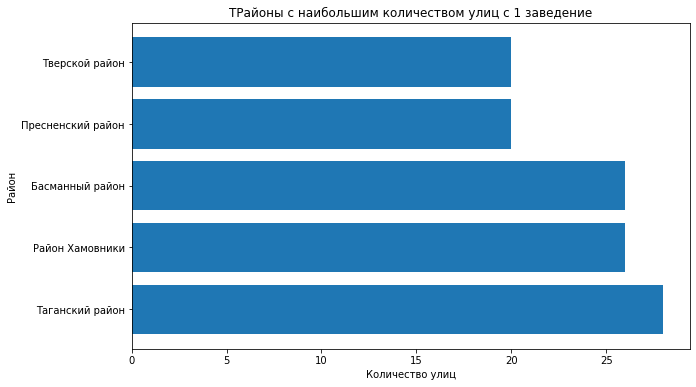

In [41]:
plt.figure(figsize=(10,6))
plt.barh(area_with_one['area'].head(5), area_with_one['id'].head(5))
plt.title('ТРайоны с наибольшим количеством улиц с 1 заведение')
plt.xlabel('Количество улиц')
plt.ylabel('Район')
plt.show()

Наибольшее количество улиц с 1 заведением находится в центральных районах.

In [42]:
print('Районы, в которых находятся улицы с одним объектом общественного питания:')
for area in streets_with_one_merged['area'].sort_values().unique():
    print('-', area)

Районы, в которых находятся улицы с одним объектом общественного питания:
- Алексеевский район
- Алтуфьевский район
- Бабушкинский район
- Басманный район
- Бескудниковский Район
- Бутырский район
- Войковский Район
- Головинский район
- Даниловский район
- Дмитровский район
- Донской район
- Красносельский район
- Лосиноостровский район
- Мещанский район
- Можайский Район
- Молжаниновский район
- Нагорный район
- Нижегородский район
- Обручевский район
- Останкинский район
- Панфиловский район
- Пресненский район
- Район Арбат
- Район Аэропорт
- Район Беговой
- Район Бирюлево Восточное
- Район Богородское
- Район Внуково
- Район Восточное Измайлово
- Район Восточный
- Район Выхино-Жулебино
- Район Гагаринский
- Район Гольяново
- Район Дорогомилово
- Район Замоскворечье
- Район Западное Дегунино
- Район Зюзино
- Район Ивановское
- Район Измайлово
- Район Капотня
- Район Коньково
- Район Коптево
- Район Косино-Ухтомский
- Район Котловка
- Район Крюково
- Район Кузьминки
- Район Кунцево


## Общий вывод

Наибольшую долю рынка занимаю кафе (6008 заведений), столовые(2575 заведений), рестораны (2274 заведений) и предприятия общественного обслуживания (1890 заведения). При этом доля сетевых заведений составляет только 20% от всего числа заведений.

Среди сетевых заведений наиболее распространенные такие виды объектов, как: предприятия быстрого обслуживания (41%), магазинов(отделы кулинарии) (28.7%), рестораны (23.8%) и кафе (23%).

Для сетевых заведений характерно много заведений с небольшим количеством посадочных мест. Менее 5% сетевых заведений имеют больше 160 посадочных мест.

Наибольшее среднее и медианное количество мест в столовых и ресторанах 100±.

<b>Топ 10 улиц Москвы с наибольшим количеством заведений</b>

- проспект Мира - 196 заведения
- Профсоюзная улица	181 заведения
- Ленинградский проспект - 172 заведения
- Пресненская набережная - 165 заведений
- Варшавское шоссе - 163 заведений
- Ленинский проспект - 148 заведений
- проспект Вернадского - 126 заведения
- Кутузовский проспект - 114 заведений
- Каширское шоссе - 110 заведений
- Кировоградская улица - 107 заведений

Обратим внимание что все эти улицы длинные и расположены не в 1 районе Москвы. Их протяженность один из основных факторов большого количества заведений + на них расположены крупные торговые центы с большими зонами фудкорт. Они располагаются в следующих районах:
- Проспект Мира -  Алексеевский, Марьина роща, Мещанский, Останкинский, Ростокино, Свиблово, Ярославский;
- Профсоюзная улица - Академический, Коньково, Обручевский, Тёплый Стан, Черёмушки, Ясенево;
- Ленинградский проспект - Аэропорт, Беговой, Сокол, Хорошёвский;
- Пресненская набережная - Пресненский;
- Варшавское шоссе - Северное Бутово, Южное Бутово, Донской, Нагатино-Садовники, Нагорный, Северное Чертаново, Центральное Чертаново, Южное Чертаново;
- Ленинский проспект - Гагаринский, Донской, Ломоносовский, Обручевский, Проспект Вернадского, Тёплый Стан, Тропарёво-Никулино, Якиманка;
- проспект Вернадского - Гагаринский, Ломоносовский, Проспект Вернадского, Раменки, Тропарёво-Никулино;
- Кутузовский проспект - Дорогомилово, Фили-Давыдково;
- Каширское шоссе - Москворечье-Сабурово, Нагатино-Садовники, Северное Орехово-Борисово, Южное Орехово-Борисово;
- Кировоградская улица - Северное Чертаново, Центральное Чертаново, Южное Чертаново.

В Москве также имеются улицы, на которых расположено только 1 заведение общественного питания. Наибольшее количество таких улиц расположено в центральных районах: Таганский район (28 улиц), Район Хамовники (26 улиц), Басманный район (26 улиц), Пресненский район (20 улиц), Тверской район	(20 улиц).

<b>Рекомендации</b>

Для открытия можно выбрать такой вид заведения, как кафе, так как он является самым популярным, с общим количеством мест до 40. 

Можно рассмотреть варианты расположения около крупных университетов, так как данная аудитория более склонна к инновациям + постоянный приток новых людей за счет проведения постоянных форумов/конференций и набора новых студентов. Возможно стоит поискать такое место на улицах, которые попали в топ 10, но здесь неоднозначно.

В решении развития сети стоит отталкиваться от заинтересованности клиентов.